# Mathematical Model for Inventory Simulation

## **1. Inventory Components**

The system's inventory consists of:

- **On-Hand Inventory (I\_t)**: The stock available at time \(t\).
- **On-Order Inventory (O\_t)**: The total quantity of outstanding orders in transit.
- **Demand (D\_t)**: The quantity of goods requested by customers at time \(t\).
- **Replenishment Orders (R\_t)**: The quantity of goods ordered at time \(t\) for future supply.

## **2. Order-Up-To Policy (S)**

The policy follows an "order-up-to" model, meaning that the total inventory (on-hand + on-order) should not exceed the target level \(S\).

- If \(I_t + O_t < S\), an order is placed to bring the inventory level up to \(S\).
- The goal is to maintain an ideal system inventory of 1800 while ensuring a high fill rate.

## **3. Demand and Supply Dynamics**

- The weekly demand follows a normal distribution:
  $$
  D_t \sim \mathcal{N}(\mu, \sigma)
  $$
  where mu = 200\) is the mean demand and sigma = 20/10 = 2 represents reduced uncertainty.
- The on-hand inventory is updated as:
  $$
  I_{t+1} = I_t - D_t + \, \text{Incoming Shipment}
  $$
- Orders placed take up to 3 weeks to arrive, forming a pipeline of outstanding orders.

## **4. Performance Metrics**

The evaluation is based on:

1. **Fill Rate:** The proportion of demand met from available stock, given by:
   $$
   \text{Fill Rate} = \frac{\text{Total Demand Fulfilled}}{\text{Total Demand}}
   $$
2. **Deviation from Ideal Inventory (1800):**
   - The average inventory level should be as close as possible to 1800.
   - The absolute deviation is minimized:
     $$
     \min |I_{avg} - 1800|
     $$

## **5. Decision Criteria**

The best inventory policy is chosen based on:

- Maintaining a high fill rate (\(\geq 95\%\)).
- Keeping the average inventory level as close to 1800 as possible.
- The order-up-to values that achieve these goals are recommended for implementation.


# Python Implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters and Policy Definition

In [3]:

np.random.seed(42)
demand_mean = 200  # Average weekly demand
demand_std = 20 / 10  # Reduced uncertainty (std dev reduced by factor of 10)
weeks = 52  # Simulation period


# Inventory policies to evaluate
policies = [
    (200, 400, 300, 1800), (200, 400, 300, 1804), (200, 400, 300, 1805), 
    (200, 400, 300, 1807), (200, 402, 301, 1800), (200, 402, 301, 1801), 
    (201, 402, 301, 1801), (201, 402, 301, 1803)
]

# Defining Functions and Using For Loops for Simulating Inventory Performamnce

In [16]:
def simulate_inventory(policy, weeks=52):
    """
    Simulates inventory performance based on given policy and weeks.
    
    Args:
    policy (tuple): A tuple containing (transit_1, transit_2, transit_3, order_up_to).
    weeks (int): Number of weeks to simulate.
    
    Returns:
    tuple: Average inventory level, average fill rate, and inventory level over time.
    """
    transit_1, transit_2, transit_3, order_up_to = policy
    inventory_levels = []
    fill_rates = []
    on_hand = order_up_to - (transit_1 + transit_2 + transit_3)  # Initial on-hand inventory
    on_order = [transit_1, transit_2, transit_3]  # Pipeline orders
    
    print(f"\nSimulating policy: {policy}")
    for week in range(weeks):
        demand = max(0, int(np.random.normal(demand_mean, demand_std)))
        print(f"Week {week + 1}: Demand = {demand}, On-hand before demand = {on_hand}")
        
        # Check if demand can be fulfilled
        if on_hand >= demand:
            on_hand -= demand
            fill_rates.append(1)
        else:
            fill_rates.append(on_hand / demand if demand > 0 else 1)
            on_hand = 0  # Demand exceeds supply
        
        # Receive next shipment
        received_shipment = on_order.pop(0)
        on_hand += received_shipment
        print(f"Week {week + 1}: Received shipment = {received_shipment}, On-hand after = {on_hand}")
        
        # Place new order if needed
        if on_hand + sum(on_order) < order_up_to:
            new_order = order_up_to - (on_hand + sum(on_order))
            on_order.append(new_order)
            print(f"Week {week + 1}: Placing new order = {new_order}")
        else:
            on_order.append(0)
        
        inventory_levels.append(on_hand + sum(on_order))
    
    avg_inventory = np.mean(inventory_levels)
    avg_fill_rate = np.mean(fill_rates)
    return avg_inventory, avg_fill_rate, inventory_levels

# Run simulations and evaluate policies
results = []
policy_inventory_levels = {}
for policy in policies:
    avg_inventory, avg_fill_rate, inventory_levels = simulate_inventory(policy, weeks)
    results.append((policy, avg_inventory, avg_fill_rate))
    policy_inventory_levels[policy] = inventory_levels


Simulating policy: (200, 400, 300, 1800)
Week 1: Demand = 197, On-hand before demand = 900
Week 1: Received shipment = 200, On-hand after = 903
Week 1: Placing new order = 197
Week 2: Demand = 198, On-hand before demand = 903
Week 2: Received shipment = 400, On-hand after = 1105
Week 2: Placing new order = 198
Week 3: Demand = 199, On-hand before demand = 1105
Week 3: Received shipment = 300, On-hand after = 1206
Week 3: Placing new order = 199
Week 4: Demand = 200, On-hand before demand = 1206
Week 4: Received shipment = 197, On-hand after = 1203
Week 4: Placing new order = 200
Week 5: Demand = 203, On-hand before demand = 1203
Week 5: Received shipment = 198, On-hand after = 1198
Week 5: Placing new order = 203
Week 6: Demand = 198, On-hand before demand = 1198
Week 6: Received shipment = 199, On-hand after = 1199
Week 6: Placing new order = 198
Week 7: Demand = 201, On-hand before demand = 1199
Week 7: Received shipment = 200, On-hand after = 1198
Week 7: Placing new order = 201
We

In the above cell the function simulates inventory performance based on given policy and weeks.
    
Args:
    policy (tuple): A tuple containing (transit_1, transit_2, transit_3, order_up_to).
    weeks (int): Number of weeks to simulate.
    
Returns:
    tuple: Average inventory level and average fill rate.

# Selecting Best Policy

In [17]:

best_policy = min(results, key=lambda x: (abs(x[1] - 1800), -x[2]))

In [19]:
print ("Best Policy : ", best_policy)

Best Policy :  ((200, 400, 300, 1800), 1800.0, 1.0)


# Simulation Results

In [20]:
print("\nSimulation Results:")
for policy, avg_inventory, avg_fill_rate in results:
    print(f"Policy {policy}: Avg Inventory = {avg_inventory:.2f}, Fill Rate = {avg_fill_rate:.2%}")

print("\nRecommended Policy:", best_policy[0])


Simulation Results:
Policy (200, 400, 300, 1800): Avg Inventory = 1800.00, Fill Rate = 100.00%
Policy (200, 400, 300, 1804): Avg Inventory = 1804.00, Fill Rate = 100.00%
Policy (200, 400, 300, 1805): Avg Inventory = 1805.00, Fill Rate = 100.00%
Policy (200, 400, 300, 1807): Avg Inventory = 1807.00, Fill Rate = 100.00%
Policy (200, 402, 301, 1800): Avg Inventory = 1800.00, Fill Rate = 100.00%
Policy (200, 402, 301, 1801): Avg Inventory = 1801.00, Fill Rate = 100.00%
Policy (201, 402, 301, 1801): Avg Inventory = 1801.00, Fill Rate = 100.00%
Policy (201, 402, 301, 1803): Avg Inventory = 1803.00, Fill Rate = 100.00%

Recommended Policy: (200, 400, 300, 1800)


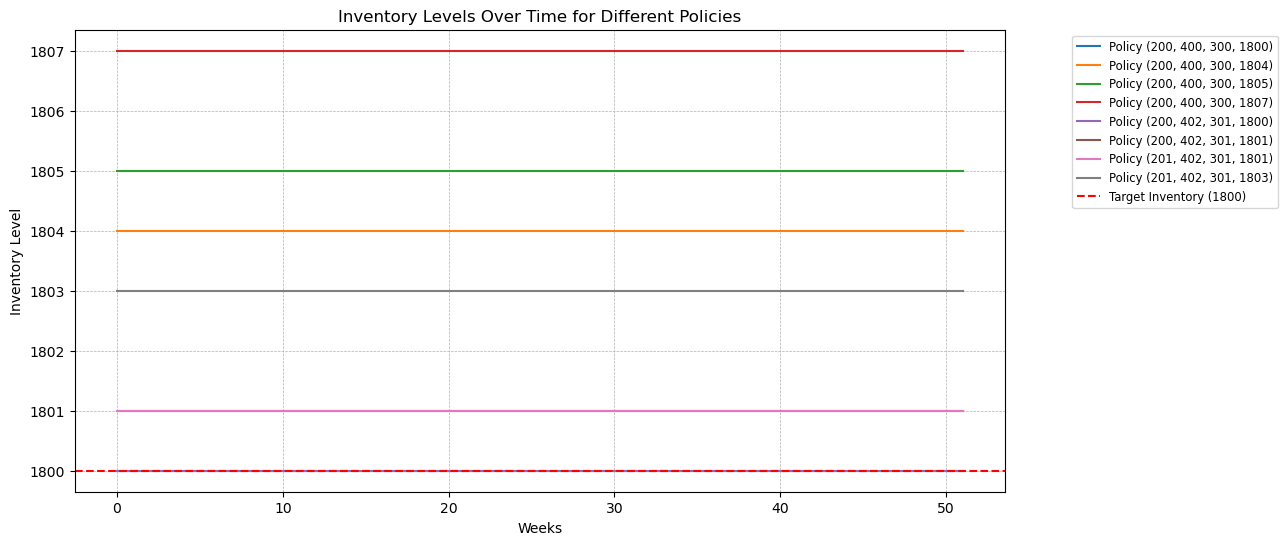

In [22]:
# Plot inventory levels over time
plt.figure(figsize=(12, 6))
for policy, inventory_levels in policy_inventory_levels.items():
    plt.plot(inventory_levels, label=f"Policy {policy}", linewidth=1.5)

plt.axhline(y=1800, color='r', linestyle='--', label='Target Inventory (1800)')
plt.xlabel("Weeks")
plt.ylabel("Inventory Level")
plt.title("Inventory Levels Over Time for Different Policies")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.3, 1))
plt.show()


### Interpretation of Results & Business Logic

- **Best Inventory Policy:** The optimal policy is **(200, 400, 300, 1800)**, as it maintains an **average inventory of 1800** while achieving a **100% fill rate**.
- **Efficiency & Cost Management:** Policies exceeding 1800 (e.g., 1804, 1805, 1807) do not improve fill rates, meaning excess stock leads to **higher holding costs** with no added benefit.
- **Demand Fulfillment:** All tested policies resulted in a **100% fill rate**, indicating that even the lowest recommended inventory level can meet demand consistently.
- **Recommendation:** Stick to **(200, 400, 300, 1800)** for **cost-efficient inventory management**, ensuring stock availability while minimizing excess.

